In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm,inv
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f=lambda x:x**2-15*x+1
f_=lambda x:2*x-15
f__=lambda x:2

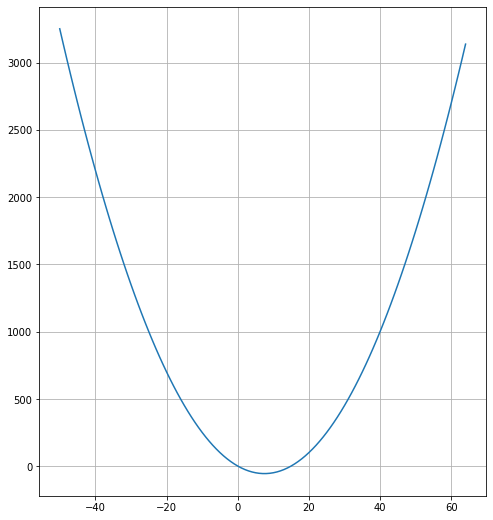

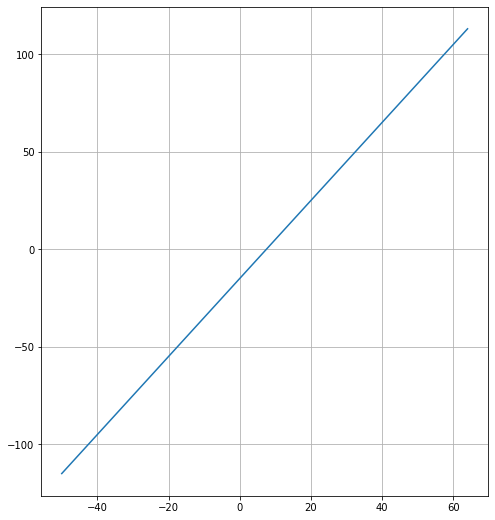

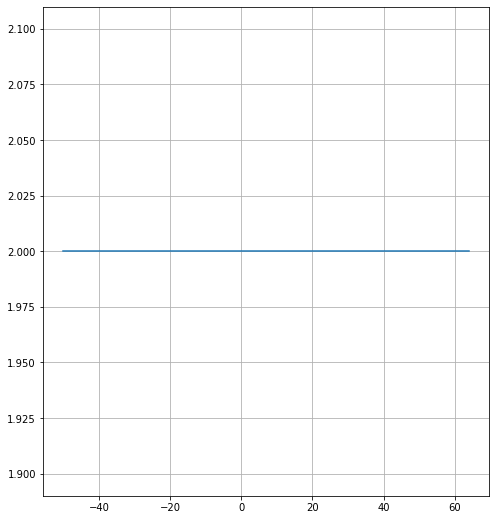

In [9]:
x=np.arange(-50,65)
plt.figure(figsize=(8,9))
plt.plot(x,f(x))
plt.grid()
plt.figure(figsize=(8,9))
plt.plot(x,f_(x))
plt.grid()
plt.figure(figsize=(8,9))
plt.plot(x,[f__(x)]*115)
plt.grid()

In [12]:
def gradient_descent(f_,learning_rate,x0,epsilon):
    max_iteration=1000
    x=x0
    for i in range(max_iteration):
        gradient=f_(x)
        gradient_norm=norm(gradient)
        if gradient_norm < epsilon:
            break
        x=x-learning_rate*gradient
    return i,x,gradient    

In [13]:
i,x,gradient=gradient_descent(f_,learning_rate=0.01,x0=40,epsilon=0.1)
print("GD Results with x0 =40, lr=0.01, epsilon=0.1")
print(f"Found solution after {i} iterations.")
print("x_min =",x)
print("Gradient =",gradient)

GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [64]:
def Newton_method(f,f_,f__,learning_rate,x0,epsilon):
    max_iteration=1000
    x=x0
    for i in range(max_iteration):
        gradient=f_(x)
        secand_derivative=f__(x)
        gradient_norm=norm(gradient)
        if gradient_norm < epsilon:
            break
        if i>0:
            if np.abs(f(i-1)-f(i))<epsilon:
                break
        x=x-learning_rate*(f_(x)/f__(x))
    return i,x,gradient  

In [65]:
i,x,gradient=Newton_method(f,f_,f__,learning_rate=1,x0=40,epsilon=0.1)
print("GD Results with x0 =40,  epsilon=0.1")
print(f"Found solution after {i} iterations.")
print("x_min =",x)
print("Gradient =",gradient)

GD Results with x0 =40,  epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [29]:
i,x,gradient=Newton_method(f,f_,f__,learning_rate=0.8,x0=40,epsilon=0.1)
print("Newton Results  with x0 =40, epsilon=0.1, lr=0.8")
print(f"Found solution after {i} iterations.")
print("x_min =",x)
print("Gradient =",gradient)

Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [2]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

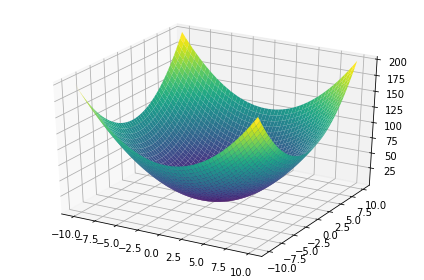

In [33]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

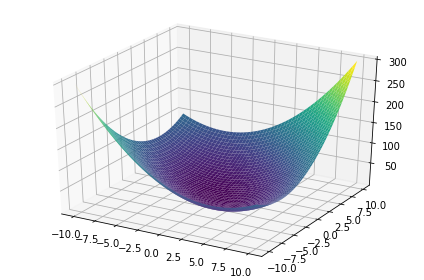

In [34]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

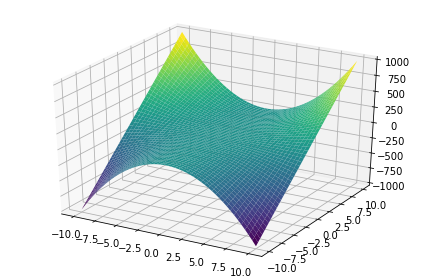

In [35]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+y^2$

In [3]:
f1=lambda x,y:x**2+y**2
f1_grad = lambda x, y: [2*x, 2*y]
f1_hessian = lambda x, y: np.array([[2, 0], [0, 2]])

In [7]:
def multi_variable_gradient_descent(f_grad, learning_rate, x0, epsilon):
    max_iteration = 1000
    x = np.array(x0)
    
    for i in range(max_iteration):
        gradient = f_grad(*x)  
        gradient_norm = norm(gradient)
        
        if gradient_norm < epsilon:
            break
        
        x = x - learning_rate * np.array(gradient)
    
    return i, x, gradient

In [60]:
i,x,gradient=multi_variable_gradient_descent(f1_grad,learning_rate=0.1,x0=(10,10),epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 46 iterations.
xy_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]


In [59]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]


In [61]:
i,x,gradient=multi_variable_gradient_descent(f1_grad,learning_rate=0.5,x0=(10,10),epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [60]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [10]:
def multi_variables_newtons_method( f_grad, f_hessian,learning_rate, x0, epsilon):
    x = np.array(x0)
    max_iterations=1000
    for i in range(max_iterations):
        gradient = f_grad(*x)
        hessian = f_hessian(*x)
        gradient_norm = norm(gradient)
        
        if gradient_norm < epsilon:
            break
        x = x - learning_rate * np.dot(inv(hessian), gradient)

    
    return i,x, gradient

In [71]:
i,x, gradient=multi_variables_newtons_method( f1_grad, f1_hessian, learning_rate=1,x0=(10,10), epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [61]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [5]:
i,x, gradient=multi_variables_newtons_method( f1_grad, f1_hessian, learning_rate=0.5,x0=(10,10), epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


In [62]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


In [6]:
f2 = lambda x, y: x**2 + x*y + y**2
f2_grad = lambda x, y: [2*x + y, x + 2*y]
f2_hessian = lambda x, y: np.array([[2, 1], [1, 2]])

In [8]:
i,x,gradient=multi_variable_gradient_descent(f2_grad,learning_rate=0.5,x0=(10,10),epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [63]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [12]:
i,x, gradient=multi_variables_newtons_method(f2_grad, f2_hessian, learning_rate=1,x0=(10,10), epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [64]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [13]:
i,x, gradient=multi_variables_newtons_method( f2_grad, f2_hessian, learning_rate=0.9,x0=(10,10), epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 5 iterations.
xy_min =
 [[1.e-04]
 [1.e-04]]
Gradient =
 [[0.0003]
 [0.0003]]


In [65]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


In [18]:
f3 = lambda x, y: x**2 * y
f3_grad = lambda x, y: [2*x*y, x**2]
f3_hessian = lambda x, y: np.array([[2*y, 2*x], [2*x, 0]])

In [19]:
i,x,gradient=multi_variable_gradient_descent(f3_grad,learning_rate=0.01,x0=(10,10),epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [67]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [20]:
i,x, gradient=multi_variables_newtons_method( f3_grad, f3_hessian, learning_rate=1,x0=(10,10), epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",(np.matrix([x]).T))
print("Gradient =\n",np.matrix([gradient]).T)

Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


In [68]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [33]:
f1 = lambda x: x[0]**2 + x[1]**2
f1_grad = lambda x: np.array([2*x[0], 2*x[1]])

In [49]:
def BFGS(f_grad, xk, x0, learning_rate, epsilon):
    max_iteration = 1000
    B_inv = np.eye(len(x0))
    xn_1 = xk
    xn = np.array(x0)
    Dfxn_1 = f_grad(xn_1)

    for i in range(max_iteration):
        print("Iteration:", i)
        print("xn_1:\n", np.matrix([xn_1]).T)
        print("xn:\n", np.matrix([xn]).T)
        print("Dfxn_1\n", np.matrix([Dfxn_1]).T)

        Dfxn = f_grad(xn)
        print("Dfxn\n", np.matrix([Dfxn]).T)
        
        gradient_norm = norm(Dfxn)
        print(gradient_norm)
        print("*****")

        if gradient_norm < epsilon:
            break

        delta_x = xn - xn_1
        delta_g = Dfxn - Dfxn_1
        Denominator= 1 / np.dot(delta_g, delta_x)

        term_1 = np.eye(len(x0)) - Denominator * np.outer(delta_x, delta_g)
        term_2 = np.eye(len(x0)) - Denominator * np.outer(delta_g, delta_x)

        B_inv = np.dot(term_1, np.dot(B_inv, term_2)) + Denominator * np.outer(delta_x, delta_x)
        print("B_inv\n",B_inv)
        print("****************")

        xn_1 = xn
        xn = xn - learning_rate * np.dot(B_inv, Dfxn)
        Dfxn_1 = Dfxn

    return xn, Dfxn, i


In [50]:
xn, Dfxn, i=BFGS(f1_grad, xk=[10,10], x0=[9,9], learning_rate=1, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[20]
 [20]]
Dfxn
 [[18]
 [18]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[0.]
 [0.]]
Dfxn_1
 [[18]
 [18]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [51]:
xn, Dfxn, i=BFGS(f1_grad, xk=[10,10], x0=[9,9], learning_rate=0.9, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[20]
 [20]]
Dfxn
 [[18]
 [18]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1
 [[18]
 [18]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 2
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 3
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 4
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 5
xn_1:
 [[0.0009]
 [0.0009]]
xn:
 [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.00

In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [52]:
f2 = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2
f2_grad = lambda x: np.array([2*x[0] + x[1], x[0] + 2*x[1]])

In [53]:
xn, Dfxn, i=BFGS(f2_grad, xk=[10,10], x0=[9,9], learning_rate=1, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[30]
 [30]]
Dfxn
 [[27]
 [27]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27]
 [27]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [74]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [54]:
xn, Dfxn, i=BFGS(f2_grad, xk=[10,10], x0=[9,9], learning_rate=0.9, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[30]
 [30]]
Dfxn
 [[27]
 [27]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1
 [[27]
 [27]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 2
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 3
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 4
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.0038183766184073484
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.

In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [55]:
f3 = lambda x: x[0]**2 * x[1]
f3_grad = lambda x: np.array([2*x[0]*x[1], x[0]**2])

In [57]:
xn, Dfxn, i=BFGS(f3_grad, xk=[10,10], x0=[9,9], learning_rate=1, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[200]
 [100]]
Dfxn
 [[162]
 [ 81]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162]
 [ 81]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
Iteration: 2
xn_1:
 [[4.73684211]
 [4.73684211]]
xn:
 [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220426
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
Iteration: 3
xn_1:
 [[3.10344828]
 [3.10344828]]
xn:
 [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398029
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
Iteration: 4
xn_1:
 [[1.875]
 [1.875]]
xn:
 [[1.16883117]
 [1.1688311

In [76]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332

In [ ]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,learning_rate=0.9

In [58]:
xn, Dfxn, i=BFGS(f3_grad, xk=[10,10], x0=[9,9], learning_rate=0.9, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",(np.matrix([xn]).T))
print("Gradient =\n",np.matrix([Dfxn]).T)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[200]
 [100]]
Dfxn
 [[162]
 [ 81]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[5.16315789]
 [5.16315789]]
Dfxn_1
 [[162]
 [ 81]]
Dfxn
 [[53.31639889]
 [26.65819945]]
59.60954611896611
*****
B_inv
 [[ 0.24575746 -0.4209092 ]
 [-0.4209092   0.91242413]]
****************
Iteration: 2
xn_1:
 [[5.16315789]
 [5.16315789]]
xn:
 [[3.4691586]
 [3.4691586]]
Dfxn_1
 [[53.31639889]
 [26.65819945]]
Dfxn
 [[24.07012277]
 [12.03506138]]
26.911215367768087
*****
B_inv
 [[ 0.26083681 -0.40582986]
 [-0.40582986  0.92750348]]
****************
Iteration: 3
xn_1:
 [[3.4691586]
 [3.4691586]]
xn:
 [[2.21439051]
 [2.21439051]]
Dfxn_1
 [[24.07012277]
 [12.03506138]]
Dfxn
 [[9.80705069]
 [4.90352534]]
10.964615995840912
*****
B_inv
 [[ 0.28087102 -0.38579564]
 [-0.38579564  0.94753769]]
****************
Iteration: 4
xn_1:
 [[2.21439051]
 [2.21439051]]
xn:
 [